In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Veri setini yükleme
data=pd.read_csv('C:/mydata/Cleaned_Dataset.csv')
df=pd.DataFrame(data)

In [4]:
#Verinin özelliklerini inceleme
data.head()

,Company,Company Score,Job Title,Date,Salary,Skills,Estimation Type,Remote,City,Country
0,Razorpoint,3.4,Junior Data Scientist,3.0,35000.0,"Data mining, Big data, R, Data analysis skills...",Employer est.,Onsite,Manchester,England
1,tower Hamlets,3.7,Assistant Data Scientist (Graduate) | R-2375,5.0,64480.0,"R, SQL, JavaScript, Python",Employer est.,Onsite,London,England
2,TW,4.0,Data Scientist,31.0,57500.0,"SQL, Maths, Data science, Python",Employer est.,Onsite,Nottingham,England
3,NatWest Group,4.6,Data Scientist,2.0,47500.0,"Software deployment, Data analysis skills, Sta...",Glasdoor est.,Onsite,Edinburgh,Scotland
4,iwoca,3.9,Data Scientist - Ops,7.0,75000.0,"MATLAB, R, Maths, C, Machine learning",Employer est.,Onsite,London,England


In [5]:
data.columns

Index(['Company', 'Company Score', 'Job Title', 'Date', 'Salary', 'Skills',
       'Estimation Type', 'Remote', 'City', 'Country'],
      dtype='object')

In [6]:
data.dtypes

Company             object
Company Score      float64
Job Title           object
Date               float64
Salary             float64
Skills              object
Estimation Type     object
Remote              object
City                object
Country             object
dtype: object

In [7]:
data.isnull().sum()

Company             0
Company Score       0
Job Title           0
Date                0
Salary              0
Skills              0
Estimation Type     0
Remote              0
City               54
Country            54
dtype: int64

In [8]:
#Eksik Verileri Düzenleme
data['City'].fillna(data['City'].mode()[0], inplace=True)
data['Country'].fillna(data['Country'].mode()[0], inplace=True)

# Kontrol et
print(data.isnull().sum())

Company            0
Company Score      0
Job Title          0
Date               0
Salary             0
Skills             0
Estimation Type    0
Remote             0
City               0
Country            0
dtype: int64


In [9]:

obj = ['Company','Country', 'City', 'Remote', 'Estimation Type','Skills', 'Job Title']
label_encoders = {}

for stn in obj:
    le=LabelEncoder()
    data[stn]=le.fit_transform(data[stn])
    label_encoders[stn]=le

In [10]:
#Şehir bazlı maaş karşılaştırma

In [11]:
city=data.groupby('City')['Salary'].mean().sort_values(ascending=False)

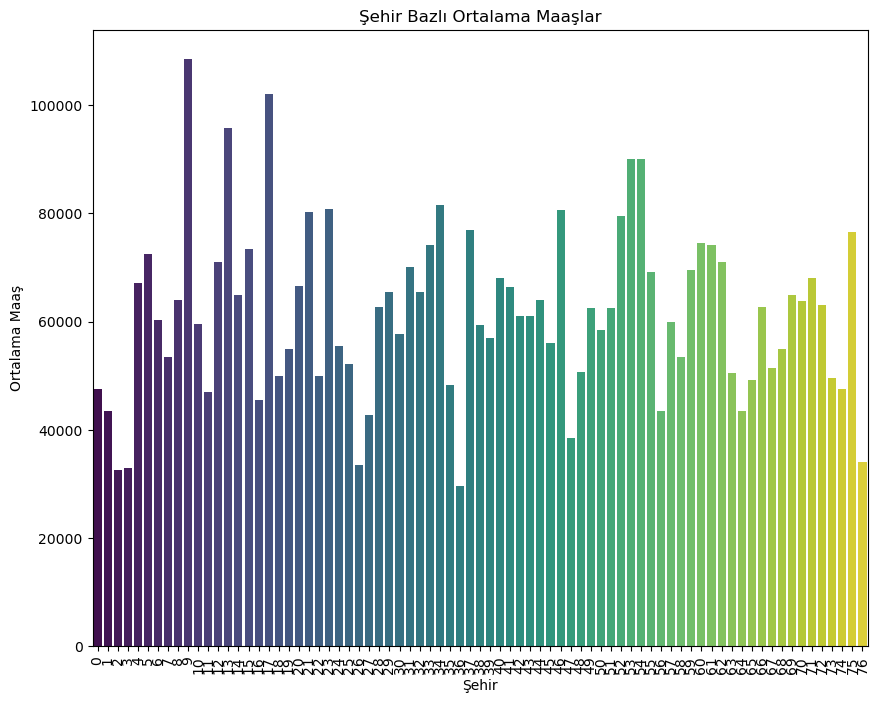

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x=city.index, y=city.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Şehir Bazlı Ortalama Maaşlar')
plt.xlabel('Şehir')
plt.ylabel('Ortalama Maaş')
plt.show()

In [13]:
#Şirketlere göre maaş karşılaştırması yapmak

In [14]:
#En yüksek maaş veren 10 şirket ve en düşük maaş veren 10 şirketi belirleme

In [15]:
company=df.groupby('Company')['Salary'].mean()

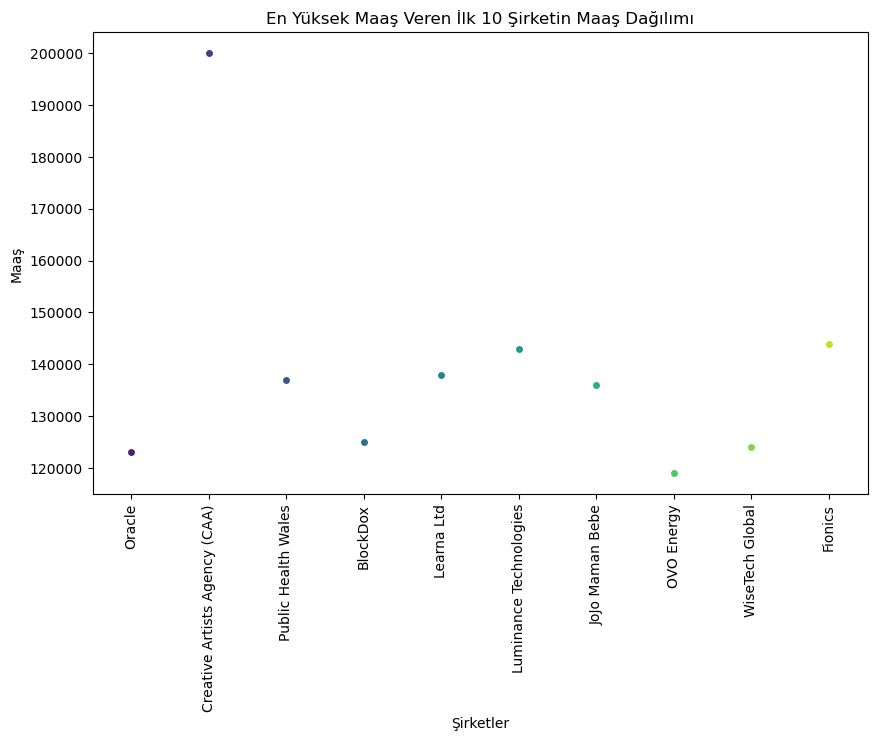

In [16]:
#En yüksek maaş veren 10 şirket
top10=company.nlargest(10).index
top10_df = df[df['Company'].isin(top10)]
plt.figure(figsize=(10,6))
sns.swarmplot(x='Company', y='Salary', data=top10_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('En Yüksek Maaş Veren İlk 10 Şirketin Maaş Dağılımı')
plt.xlabel('Şirketler')
plt.ylabel('Maaş')
plt.show()           


In [17]:
#En az maaş veren 10 şirket

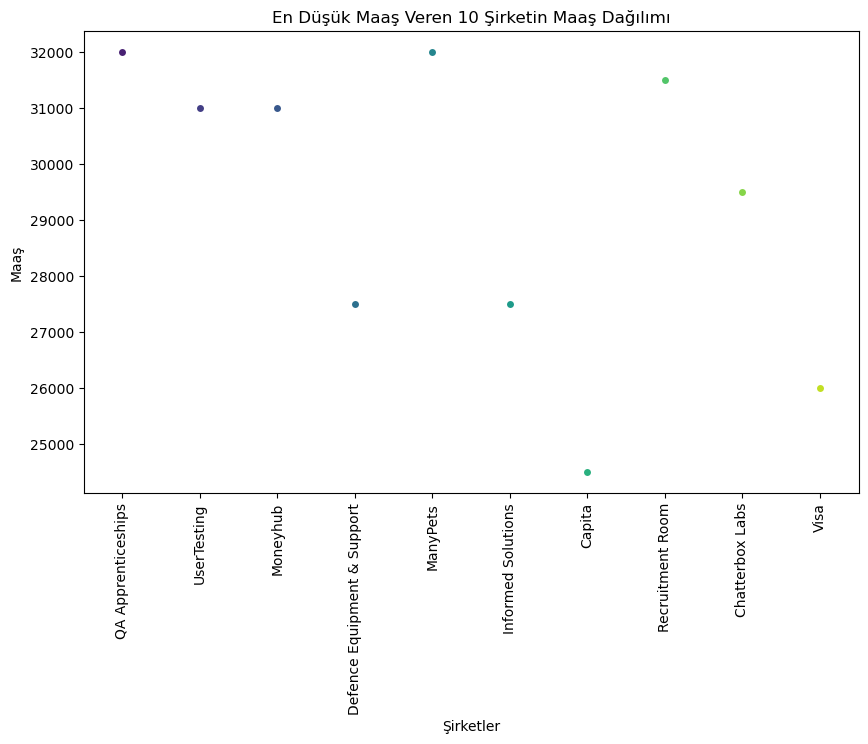

In [18]:
#En az maaş veren 10 şirket
lowest=company.nsmallest(10).index
lowest_df = df[df['Company'].isin(lowest)]
plt.figure(figsize=(10,6))
sns.swarmplot(x='Company', y='Salary', data=lowest_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('En Düşük Maaş Veren 10 Şirketin Maaş Dağılımı')
plt.xlabel('Şirketler')
plt.ylabel('Maaş')
plt.show()           


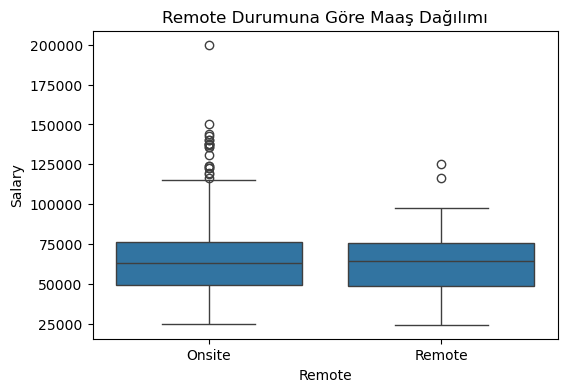

In [19]:
# 7️⃣ EDA: Skills ve Remote Analizi
# Remote pozisyonların maaşa etkisi
plt.figure(figsize=(6,4))
sns.boxplot(x='Remote', y='Salary', data=df)
plt.title('Remote Durumuna Göre Maaş Dağılımı')
plt.show()

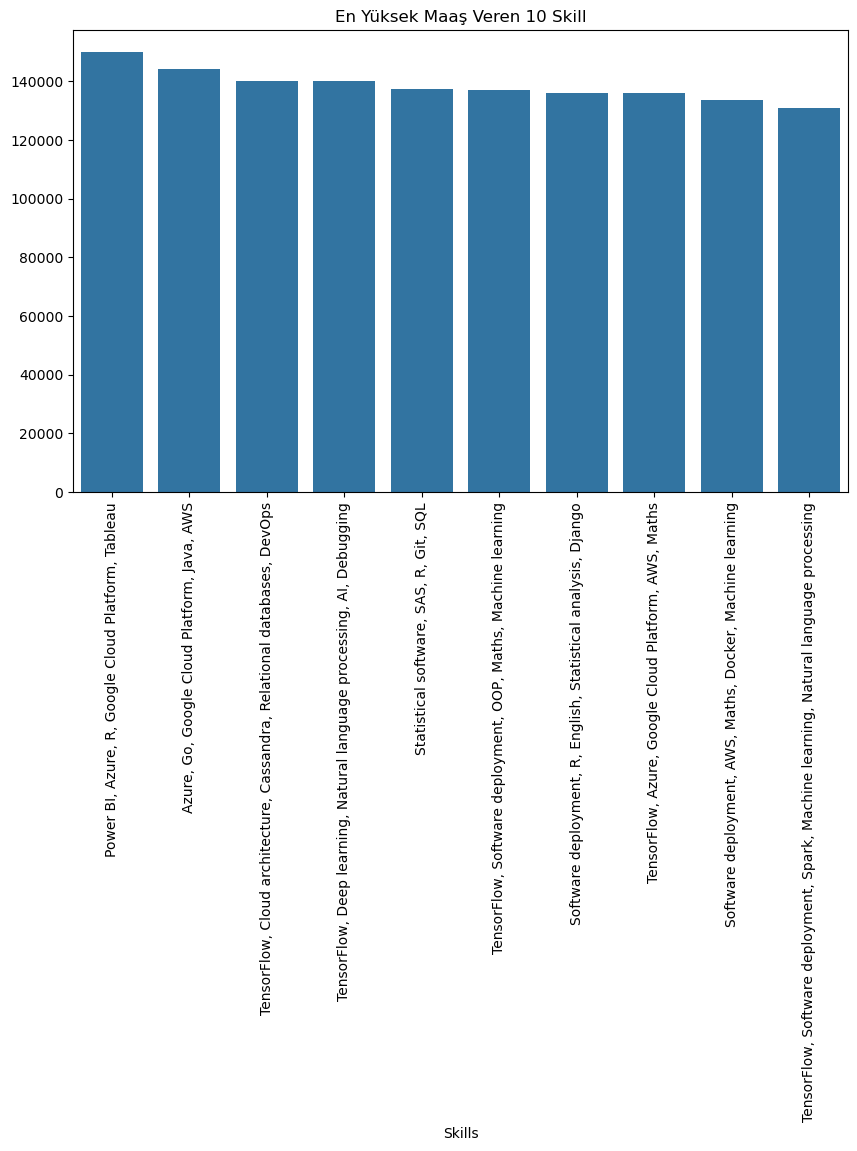

In [20]:
# En çok kazandıran top 10 skill
skills_salary = df.groupby('Skills')['Salary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=skills_salary.index, y=skills_salary.values)
plt.xticks(rotation=90)
plt.title('En Yüksek Maaş Veren 10 Skill')
plt.show()


In [21]:
#K-means ile kümeleme

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
feature=df[['Salary','Company Score']]
scaler=StandardScaler()
scaled=scaler.fit_transform(feature)

In [24]:
from sklearn.cluster import KMeans

In [25]:
sse=[]
k_value=range(1,11)

for k in k_value:
    kmean=KMeans(n_clusters=k, random_state=42)
    kmean.fit(scaled)
    sse.append(kmean.inertia_)

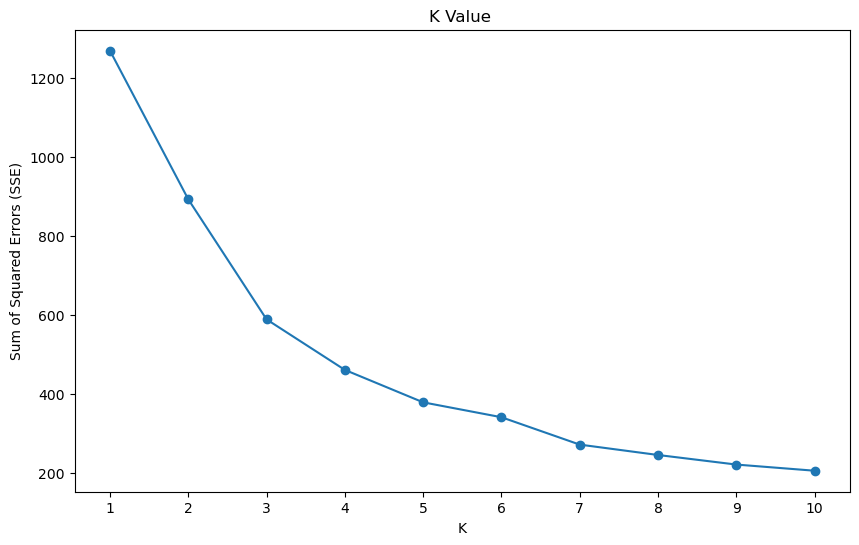

In [26]:
plt.figure(figsize=(10,6))
plt.plot(k_value, sse, marker='o')
plt.title('K Value ')
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_value)
plt.show()

In [35]:
k_val=6
kmeans=KMeans(n_clusters=k_val,random_state=42)
clusters=kmeans.fit_predict(scaled)
df['Cluster'] = clusters

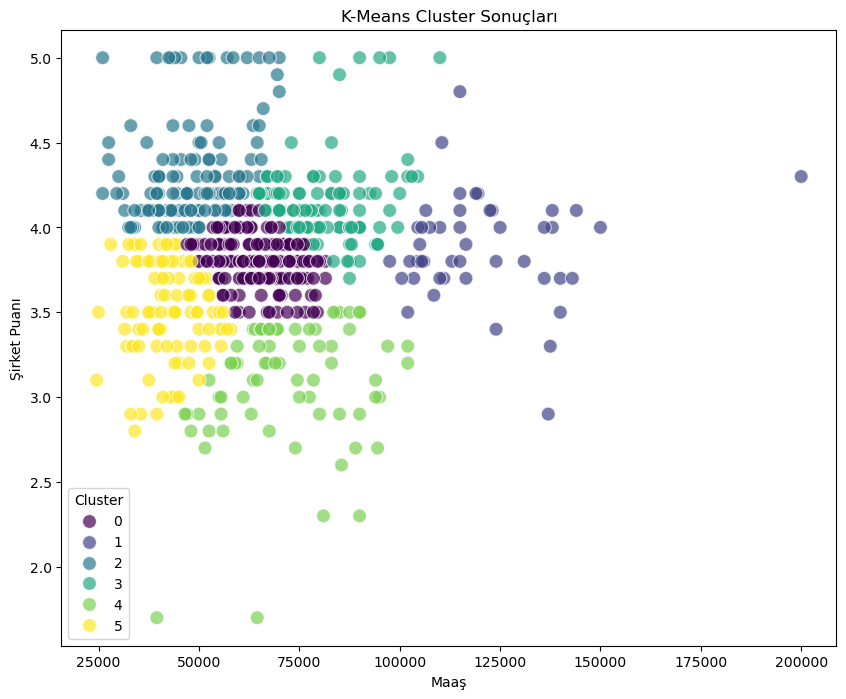

In [36]:

# 4️⃣ Kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(10,8))
sns.scatterplot(x='Salary', y='Company Score', hue='Cluster', data=df,
                palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Cluster Sonuçları')
plt.xlabel('Maaş')
plt.ylabel('Şirket Puanı')
plt.legend(title='Cluster')
plt.show()


In [38]:
cluster_profile = df.groupby('Cluster').agg({
    'Salary':'mean',
    'Company Score':'mean',
    'City':'count'
}).rename(columns={'City':'Num of Jobs'})
print(cluster_profile)


                Salary  Company Score  Num of Jobs
Cluster                                           
0         64844.000000       3.800588          170
1        120641.304348       3.882609           46
2         48264.925373       4.317910          134
3         80879.464286       4.151786          112
4         71868.055556       3.088889           72
5         42681.980198       3.510891          101
